In [33]:
import pandas as pd               #importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
df= pd.read_csv("ictac.csv")      # defining data set

In [35]:
df.head()                         # exploratory data analysis

,FUELS,NO_OF_HOLES,LOAD(%),BTE (%),BSFC,HC,Nox,OPACITY,CETANE_NO,CO,HRR,PEAK_PRESSURE
0,Diesel,3,0,0.0,0.0,11,128,6.5,52.0,0.06,22.11,48.37
1,Diesel,4,0,0.0,0.0,25,111,6.9,52.0,0.80,22.12,49.32
2,Diesel,5,0,0.0,0.0,27,101,7.3,52.0,0.10,22.11,48.37
3,RB20,3,0,0.0,0.0,27,201,7.3,48.5,0.07,23.71,49.21
4,RB20,4,0,0.0,0.0,26,234,8.9,48.5,0.07,23.71,49.18


In [36]:
df.tail()

,FUELS,NO_OF_HOLES,LOAD(%),BTE (%),BSFC,HC,Nox,OPACITY,CETANE_NO,CO,HRR,PEAK_PRESSURE
70,B20,4,100,30.5,0.34,55,108,58.5,50.0,0.21,40.31,71.32
71,B20,5,100,31.5,0.33,58,112,59.8,50.0,0.22,40.21,71.32
72,B100,3,100,33.5,0.31,64,102,63.8,51.0,0.25,40.21,71.32
73,B100,4,100,34.2,0.33,65,104,65.3,51.0,0.28,40.31,71.32
74,B100,5,100,32.8,0.32,68,106,64.2,51.0,0.27,40.21,71.32


In [37]:
df.shape

(75, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FUELS          75 non-null     object 
 1   NO_OF_HOLES    75 non-null     int64  
 2   LOAD(%)        75 non-null     int64  
 3   BTE (%)        75 non-null     float64
 4   BSFC           75 non-null     float64
 5   HC             75 non-null     int64  
 6   Nox            75 non-null     int64  
 7   OPACITY        75 non-null     float64
 8   CETANE_NO      75 non-null     float64
 9   CO             75 non-null     float64
 10  HRR            75 non-null     float64
 11  PEAK_PRESSURE  75 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 7.2+ KB


In [39]:
df.describe

<bound method NDFrame.describe of      FUELS  NO_OF_HOLES  LOAD(%)  BTE (%)  BSFC  HC  Nox  OPACITY  CETANE_NO  \
0   Diesel            3        0      0.0  0.00  11  128      6.5       52.0   
1   Diesel            4        0      0.0  0.00  25  111      6.9       52.0   
2   Diesel            5        0      0.0  0.00  27  101      7.3       52.0   
3     RB20            3        0      0.0  0.00  27  201      7.3       48.5   
4     RB20            4        0      0.0  0.00  26  234      8.9       48.5   
..     ...          ...      ...      ...   ...  ..  ...      ...        ...   
70     B20            4      100     30.5  0.34  55  108     58.5       50.0   
71     B20            5      100     31.5  0.33  58  112     59.8       50.0   
72    B100            3      100     33.5  0.31  64  102     63.8       51.0   
73    B100            4      100     34.2  0.33  65  104     65.3       51.0   
74    B100            5      100     32.8  0.32  68  106     64.2       51.0   

     

In [40]:
print(df.columns)

df["FUELS"].unique()

Index(['FUELS', 'NO_OF_HOLES', 'LOAD(%)', 'BTE (%)', 'BSFC', 'HC', 'Nox',
       'OPACITY', 'CETANE_NO', 'CO', 'HRR', 'PEAK_PRESSURE'],
      dtype='object')


array(['Diesel', 'RB20', 'CF20', 'B20', 'B100'], dtype=object)

In [41]:
df["FUELS"].value_counts()

FUELS
Diesel    15
RB20      15
CF20      15
B20       15
B100      15
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["FUELS"]=le.fit_transform(df["FUELS"])

In [43]:
df["FUELS"]

0     3
1     3
2     3
3     4
4     4
     ..
70    1
71    1
72    0
73    0
74    0
Name: FUELS, Length: 75, dtype: int32

In [44]:
x=df.drop(['BTE (%)'],axis=1)   # independent variables

In [45]:
y=df["BTE (%)"]                 # dependent variable

In [46]:
x

,FUELS,NO_OF_HOLES,LOAD(%),BSFC,HC,Nox,OPACITY,CETANE_NO,CO,HRR,PEAK_PRESSURE
0,3,3,0,0.00,11,128,6.5,52.0,0.06,22.11,48.37
1,3,4,0,0.00,25,111,6.9,52.0,0.80,22.12,49.32
2,3,5,0,0.00,27,101,7.3,52.0,0.10,22.11,48.37
3,4,3,0,0.00,27,201,7.3,48.5,0.07,23.71,49.21
4,4,4,0,0.00,26,234,8.9,48.5,0.07,23.71,49.18
...,...,...,...,...,...,...,...,...,...,...,...
70,1,4,100,0.34,55,108,58.5,50.0,0.21,40.31,71.32
71,1,5,100,0.33,58,112,59.8,50.0,0.22,40.21,71.32
72,0,3,100,0.31,64,102,63.8,51.0,0.25,40.21,71.32
73,0,4,100,0.33,65,104,65.3,51.0,0.28,40.31,71.32


In [47]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
70    30.5
71    31.5
72    33.5
73    34.2
74    32.8
Name: BTE (%), Length: 75, dtype: float64

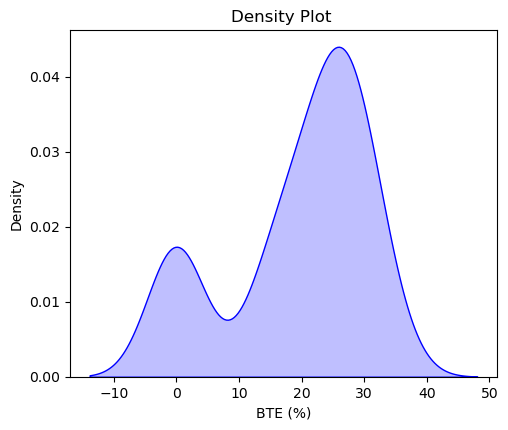

In [48]:
 plt.figure(figsize=(5.5,4.5))                             # density plot
 sns.kdeplot(y, fill=True, color='blue')          
 plt.title(f'Density Plot ')
 plt.show()

C:\Users\somas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\somas\AppData\Local\Temp\ipykernel_16808\2099005261.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)


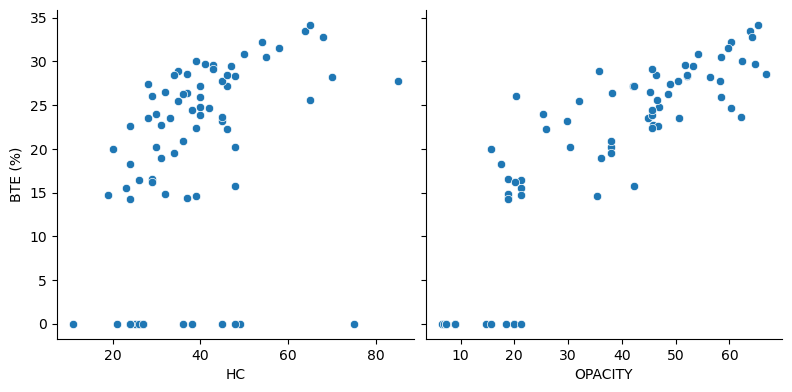

In [49]:
g = sns.pairplot(df,x_vars=['HC', 'OPACITY'],y_vars='BTE (%)',height=4,aspect=1,kind='scatter')    # scatter plot
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)
plt.show()

In [50]:
# MACHINE LEARNONG MODEL REGRESSORS 

# LINEAR REGRESSOR

from sklearn.linear_model import LinearRegression                    
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size= 0.2,random_state=30)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Square Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', rmse)


Mean Square Error: 5.075466750042528
Mean Absolute Error: 1.7642384736570225
Root Mean Square Error: 2.252879657248147


Mean Squared Error (MSE): 5.075466750042528
Mean Absolute Error (MAE): 1.7642384736570225
Root Mean Squared Error (RMSE): 2.252879657248147
    Actual  Predicted
30   26.04  27.600092
42   23.58  25.740860
73   34.20  31.880417
10    0.00   3.265710
20   14.30  11.304792


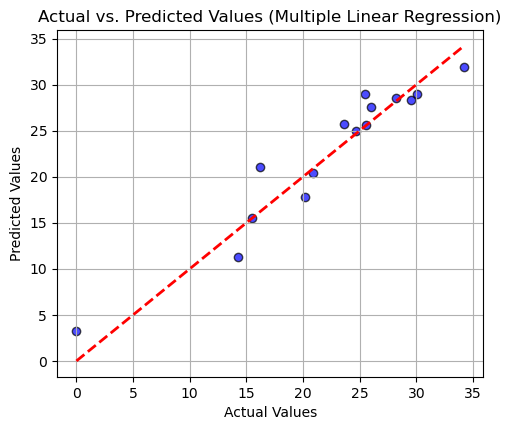

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


print(results.head())  
plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Multiple Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [52]:
print('Intercept: ',model.intercept_)
list(zip(x, model.coef_))

Intercept:  -10.02349936106637


[('FUELS', -1.492230435773887),
 ('NO_OF_HOLES', -0.49117098548655236),
 ('LOAD(%)', 0.19078251794033674),
 ('BSFC', 9.145473274958732),
 ('HC', -0.01342664898335899),
 ('Nox', -0.0009216629962824873),
 ('OPACITY', -0.2188502179396507),
 ('CETANE_NO', -0.21923429081443085),
 ('CO', -0.9469230067925176),
 ('HRR', 0.5244038286811014),
 ('PEAK_PRESSURE', 0.38333168166807985)]

Mean Squared Error (MSE): 2.716988908000007
Mean Absolute Error (MAE): 1.4084133333333329
Root Mean Squared Error (RMSE): 1.6483291261152935
    Actual  Predicted
30   26.04    23.6860
42   23.58    25.9545
73   34.20    32.6021
10    0.00     0.0000
20   14.30    15.3550


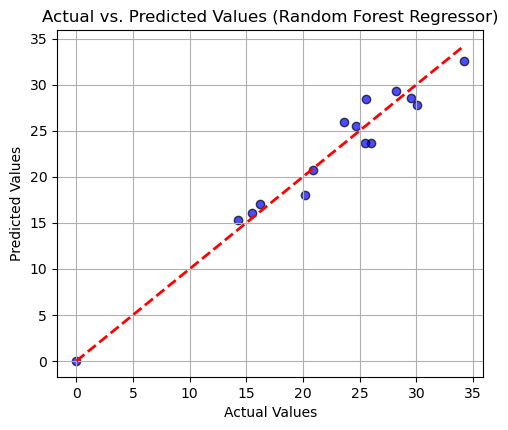

In [53]:
# RANDOM FOREST REGRESSOR 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


rf = RandomForestRegressor(n_estimators=100, random_state=30)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

random_mse = mean_squared_error(y_test, y_pred)
random_mae = mean_absolute_error(y_test, y_pred)
random_rmse = np.sqrt(random_mse)

print(f"Mean Squared Error (MSE): {random_mse}")
print(f"Mean Absolute Error (MAE): {random_mae}")
print(f"Root Mean Squared Error (RMSE): {random_rmse}")


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


print(results.head())  
plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [54]:
# SUPPORT VECTOR REGRESSOR

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size= 0.2,random_state=30)


svr_pipe = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))
svr_pipe.fit(X_train, y_train)
y_pred = svr_pipe.predict(X_test)


svr_mse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_rmse = np.sqrt(mse)


print(f"Mean Squared Error: {svr_mse}")
print(f"Mean Absolute Error (MAE): {svr_mae}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse}")

Mean Squared Error: 16.00510901613682
Mean Absolute Error (MAE): 2.706627650324451
Root Mean Squared Error (RMSE): 2.252879657248147


Mean Squared Error (MSE): 16.00510901613682
Mean Absolute Error (MAE): 2.706627650324451
Root Mean Squared Error (RMSE): 4.000638576044682
    Actual  Predicted
30   26.04  22.702566
42   23.58  26.053528
73   34.20  27.307518
10    0.00  11.669985
20   14.30  15.390368


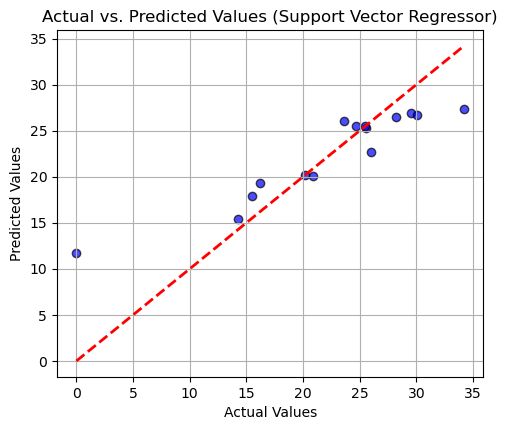

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


svr_pipe = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

svr_pipe.fit(X_train, y_train)

y_pred = svr_pipe.predict(X_test)


svr_mse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)

print(f"Mean Squared Error (MSE): {svr_mse}")
print(f"Mean Absolute Error (MAE): {svr_mae}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


print(results.head())  
plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Support Vector Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


Decision Tree Regressor Mean Squared Error (MSE): 4.2251400000000015
Decision Tree Regressor Mean Absolute Error (MAE): 1.3926666666666667
Decision Tree Regressor Root Mean Squared Error (RMSE): 2.0555145341252152
    Actual  Predicted
30   26.04      23.90
42   23.58      29.54
73   34.20      33.50
10    0.00       0.00
20   14.30      14.43


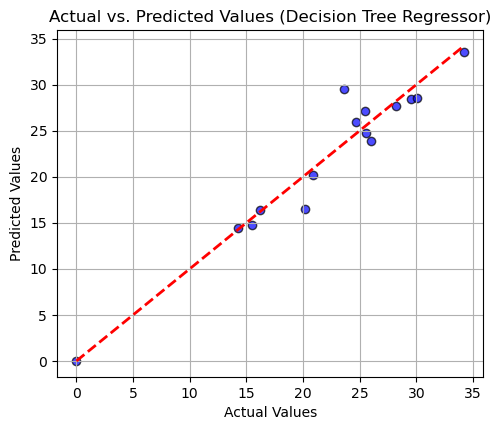

In [56]:
#DECISION TREE REGRESSOR 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

model = DecisionTreeRegressor()


model.fit(X_train, y_train)


predictions = model.predict(X_test)

tree_mse = mean_squared_error(y_test, predictions)
tree_mae = mean_absolute_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)

print(f"Decision Tree Regressor Mean Squared Error (MSE): {tree_mse}")
print(f"Decision Tree Regressor Mean Absolute Error (MAE): {tree_mae}")
print(f"Decision Tree Regressor Root Mean Squared Error (RMSE): {tree_rmse}")


results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

print(results.head())  
plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Decision Tree Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


k-NN Regressor Mean Squared Error (MSE): 8.348936000000002
k-NN Regressor Mean Absolute Error (MAE): 2.470933333333334
k-NN Regressor Root Mean Squared Error (RMSE): 2.88945254330297
    Actual  Predicted
30   26.04     24.494
42   23.58     26.222
73   34.20     32.104
10    0.00      0.000
20   14.30     18.350


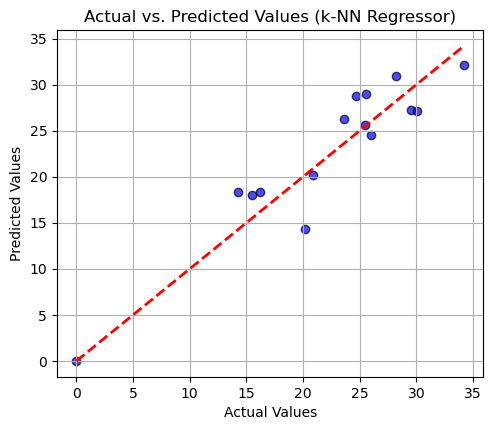

In [57]:
#KNN REGRESSOR

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

model = KNeighborsRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)


knn_mse = mean_squared_error(y_test, predictions)
knn_mae = mean_absolute_error(y_test, predictions)
knn_rmse = np.sqrt(knn_mse)

print(f"k-NN Regressor Mean Squared Error (MSE): {knn_mse}")
print(f"k-NN Regressor Mean Absolute Error (MAE): {knn_mae}")
print(f"k-NN Regressor Root Mean Squared Error (RMSE): {knn_rmse}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


print(results.head())  
plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (k-NN Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


Gradient Boosting Regressor Mean Squared Error (MSE): 2.917562395952832
Gradient Boosting Regressor Mean Absolute Error (MAE): 1.4079702227450988
Gradient Boosting Regressor Root Mean Squared Error (RMSE): 1.7080873502115845
    Actual  Predicted
30   26.04  24.430376
42   23.58  26.484023
73   34.20  32.592383
10    0.00   0.012386
20   14.30  15.047704


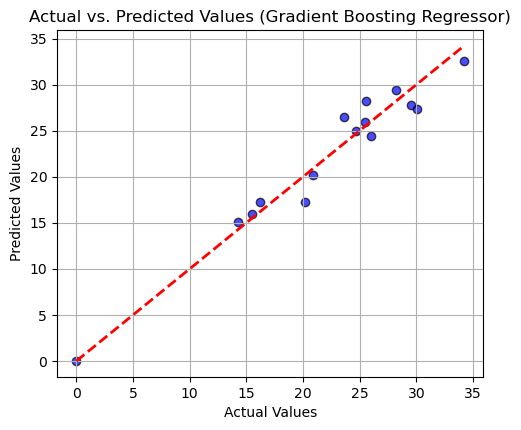

In [58]:
#GRADIENT BOOSTING REGRESSOR 


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


model = GradientBoostingRegressor()


model.fit(X_train, y_train)


predictions = model.predict(X_test)


gboost_mse = mean_squared_error(y_test, predictions)
gboost_mae = mean_absolute_error(y_test, predictions)
gboost_rmse = np.sqrt(gboost_mse)

print(f"Gradient Boosting Regressor Mean Squared Error (MSE): {gboost_mse}")
print(f"Gradient Boosting Regressor Mean Absolute Error (MAE): {gboost_mae}")
print(f"Gradient Boosting Regressor Root Mean Squared Error (RMSE): {gboost_rmse}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

print(results.head())  
plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


XGBoost Regressor Mean Squared Error (MSE): 2.6694967946535644
XGBoost Regressor Mean Absolute Error (MAE): 1.2882619415521626
XGBoost Regressor Root Mean Squared Error (RMSE): 1.6338594782457776
    Actual  Predicted
30   26.04  24.348085
42   23.58  25.319038
73   34.20  32.933250
10    0.00   0.019989
20   14.30  16.012806


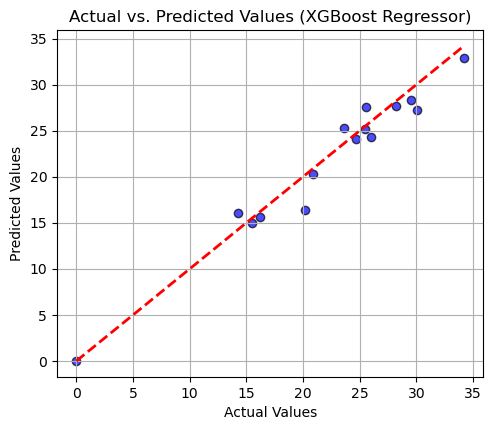

In [59]:
#XGBOOST REGRESSOR


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


model = XGBRegressor()


model.fit(X_train, y_train)

predictions = model.predict(X_test)


xgb_mse = mean_squared_error(y_test, predictions)
xgb_mae = mean_absolute_error(y_test, predictions)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost Regressor Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost Regressor Mean Absolute Error (MAE): {xgb_mae}")
print(f"XGBoost Regressor Root Mean Squared Error (RMSE): {xgb_rmse}")


results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


print(results.head())  

plt.figure(figsize=(5.5, 4.5))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (XGBoost Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


Epoch 1/500


C:\Users\somas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 450.2107 - val_loss: 495.2083
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 435.2948 - val_loss: 487.9061
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 432.9913 - val_loss: 480.5510
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 426.2804 - val_loss: 473.0489
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 432.8196 - val_loss: 465.3722
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 410.3743 - val_loss: 457.4629
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 428.0195 - val_loss: 449.2419
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 403.2115 - val_loss: 440.6838
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 397.3038 - val_loss: 431.7802
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 374.0927 - val_loss: 422.5195
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 388.0579 - val_loss: 412.8249
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

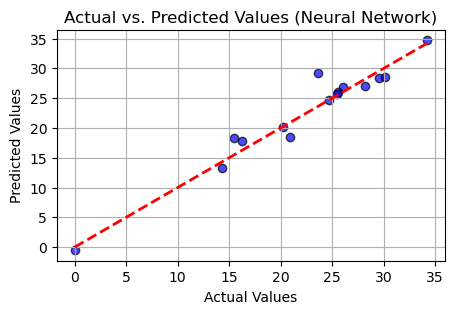

In [29]:
import tensorflow as tf               #ANN

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2)


predictions = model.predict(X_test)

# Evaluate the model
neural_mse = mean_squared_error(y_test, predictions)
neural_mae = mean_absolute_error(y_test, predictions)
neural_rmse = np.sqrt(neural_mse)

print(f"Neural Network Regressor MSE: {neural_mse}")
print(f"Neural Network Regressor MAE: {neural_mae}")
print(f"Neural Network Regressor RMSE: {neural_rmse}")


results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})


print(results.head())  

plt.figure(figsize=(5, 3))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()



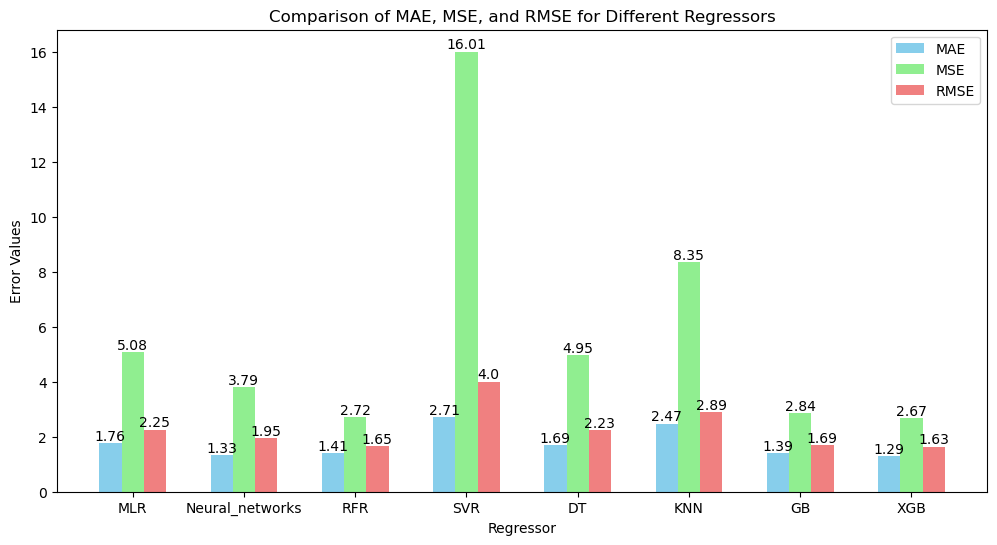

In [30]:
import matplotlib.pyplot as plt    # RESULT COMPARISON
import numpy as np


regressors = ['MLR', 'Neural_networks', 'RFR', 'SVR', 'DT', 'KNN', 'GB', 'XGB']
mae_values = [mae, neural_mae, random_mae, svr_mae, tree_mae, knn_mae, gboost_mae, xgb_mae]  # Replace with your actual MAE values
mse_values = [mse, neural_mse, random_mse, svr_mse, tree_mse, knn_mse, gboost_mse, xgb_mse]  # Replace with your actual MSE values
rmse_values = [rmse, neural_rmse,random_rmse, svr_rmse, tree_rmse, knn_rmse, gboost_rmse, xgb_rmse]  # Replace with your actual RMSE values


bar_width = 0.2
x = np.arange(len(regressors))


plt.figure(figsize=(12,6))
bars1 = plt.bar(x - bar_width, mae_values, width=bar_width, label='MAE', color='skyblue')
bars2 = plt.bar(x, mse_values, width=bar_width, label='MSE', color='lightgreen')
bars3 = plt.bar(x + bar_width, rmse_values, width=bar_width, label='RMSE', color='lightcoral')


plt.xlabel('Regressor')
plt.ylabel('Error Values')
plt.title('Comparison of MAE, MSE, and RMSE for Different Regressors')
plt.xticks(x, regressors)
plt.legend()


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()


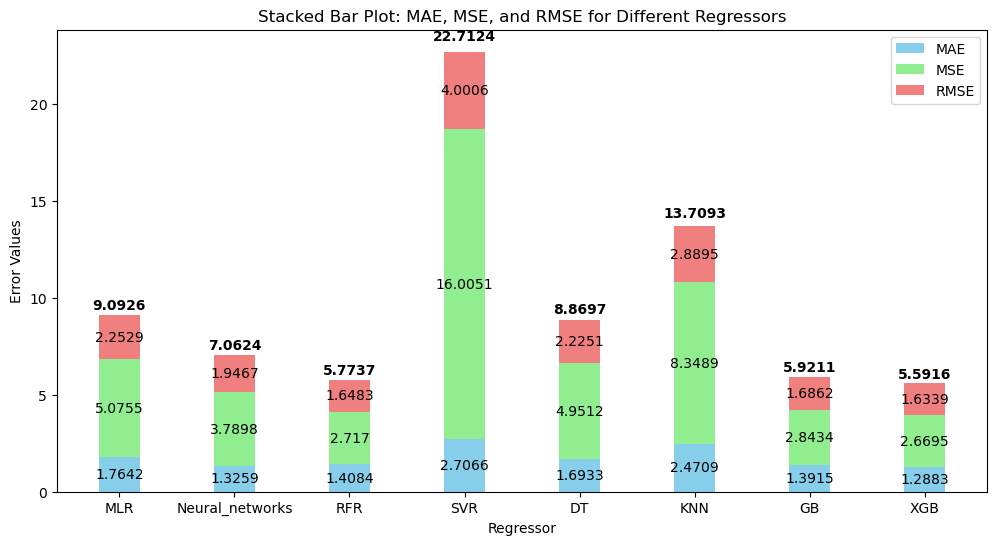

In [60]:
import matplotlib.pyplot as plt   #ERROR STACKED BAR PLOT
import numpy as np


x = np.arange(len(regressors))
bar_width = 0.35


plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, mae_values, width=bar_width, label='MAE', color='skyblue')
bars2 = plt.bar(x, mse_values, width=bar_width, label='MSE', color='lightgreen', bottom=mae_values)
bars3 = plt.bar(x, rmse_values, width=bar_width, label='RMSE', color='lightcoral', bottom=np.array(mae_values) + np.array(mse_values))


plt.xlabel('Regressor')
plt.ylabel('Error Values')
plt.title('Stacked Bar Plot: MAE, MSE, and RMSE for Different Regressors')
plt.xticks(x, regressors)
plt.legend()


for i in range(len(regressors)):
    plt.text(x[i], mae_values[i] / 2, round(mae_values[i], 4), ha='center', va='center', color='black')
    plt.text(x[i], mae_values[i] + mse_values[i] / 2, round(mse_values[i], 4), ha='center', va='center', color='black')
    plt.text(x[i], mae_values[i] + mse_values[i] + rmse_values[i] / 2, round(rmse_values[i], 4), ha='center', va='center', color='black')


    total = mae_values[i] + mse_values[i] + rmse_values[i]
    

    plt.text(x[i], total + 0.02 * total, round(total, 4), ha='center', va='bottom', fontweight='bold', color='black')   
    
    
 
plt.show()

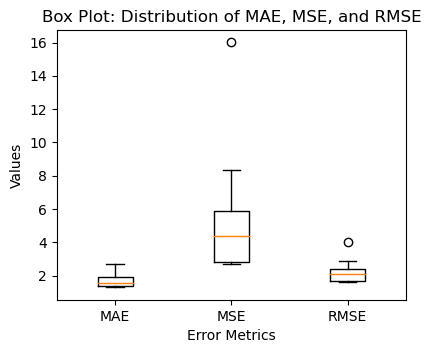

In [61]:
plt.figure(figsize=(4.5, 3.5))


data = [mae_values, mse_values, rmse_values]
plt.boxplot(data, labels=['MAE', 'MSE', 'RMSE'], patch_artist=False, notch=False)


plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Box Plot: Distribution of MAE, MSE, and RMSE')


plt.show()